In [2]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

# Import the API key
from config import api_key



In [3]:
#Get the channel_id from youtube

#Go to the About Tab of the YouTube channel
#Under the Stats section click the Share button and select Copy Channel ID.


#channel_id='UC3rY5HOgbBvGmq7RnDfwF7A'

channel_ids=['UCnz-ZXXER4jOvuED5trXfEA',#techTFQ
             'UCLLw7jmFsvfIVaUFsLs8mlQ', #Luke Barousse
             'UCiT9RITQ9PW6BhXK0y2jaeg',#Ken Jee
             'UC7cs8q-gJRlGwj4A8OmCmXg', #Alex The Analyst
              'UC2UXDak6o7rBm23k3Vv5dww'#UC2UXDak6o7rBm23k3Vv5dww 
              ]

# https://developers.google.com/youtube/v3/docs
#api_service_name = "youtube"
#api_version = "v3"
#developerKey =api_key
    

#service
youtube=build('youtube','v3',developerKey=api_key)

**Function to get youtube channel statistics**

In [15]:
#Function to get the stats for channels
def get_channel_stats(youtube,channel_ids):
    all_data =[]
    request = youtube.channels().list(
                part="snippet,contentDetails,statistics",
                id=','.join(channel_ids))
    
    response= request.execute()
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos =response['items'][i]['statistics']['videoCount'],
                    playlist_id=response['items'][i]['contentDetails'] ['relatedPlaylists']['uploads'])
        all_data.append(data)

    return all_data 

In [17]:
channel_stats = get_channel_stats(youtube ,channel_ids)

In [18]:
channel_stats_df = pd.DataFrame(channel_stats)
channel_stats_df

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Luke Barousse,384000,18163945,141,UULLw7jmFsvfIVaUFsLs8mlQ
1,techTFQ,241000,12428274,98,UUnz-ZXXER4jOvuED5trXfEA
2,Alex The Analyst,598000,24833348,253,UU7cs8q-gJRlGwj4A8OmCmXg
3,Tina Huang,571000,25601036,140,UU2UXDak6o7rBm23k3Vv5dww
4,Ken Jee,252000,8616847,284,UUiT9RITQ9PW6BhXK0y2jaeg


In [7]:
#convert the datatypes to mumeric
channel_stats_df['Subscribers'] = pd.to_numeric(channel_stats_df['Subscribers'])
channel_stats_df['Views'] = pd.to_numeric(channel_stats_df['Views'])
channel_stats_df['Total_videos'] = pd.to_numeric(channel_stats_df['Total_videos'])

In [8]:
channel_stats_df.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
dtype: object

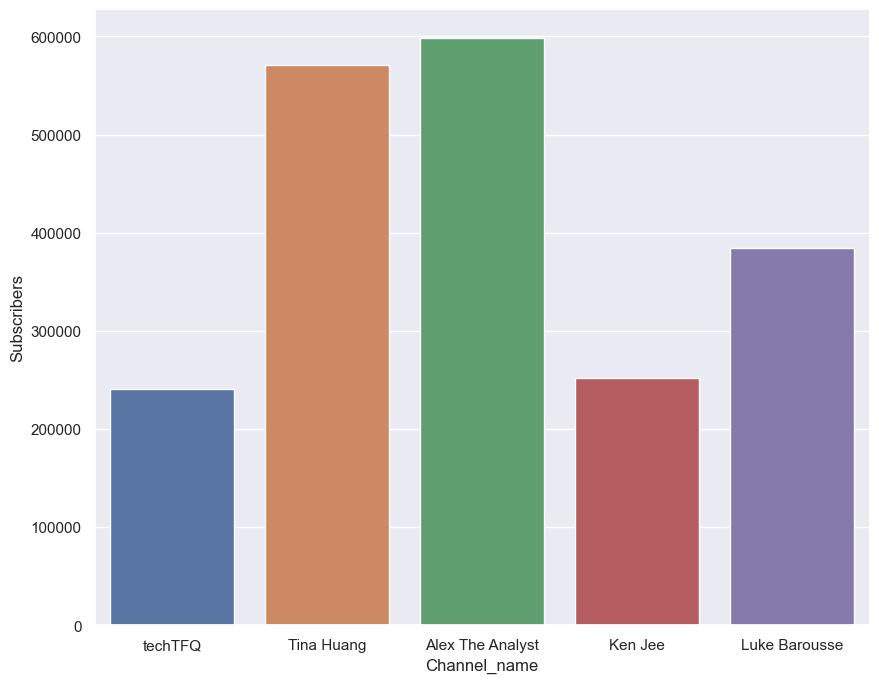

In [10]:
#create a graph

sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x = 'Channel_name' ,y = 'Subscribers' ,data=channel_stats_df)

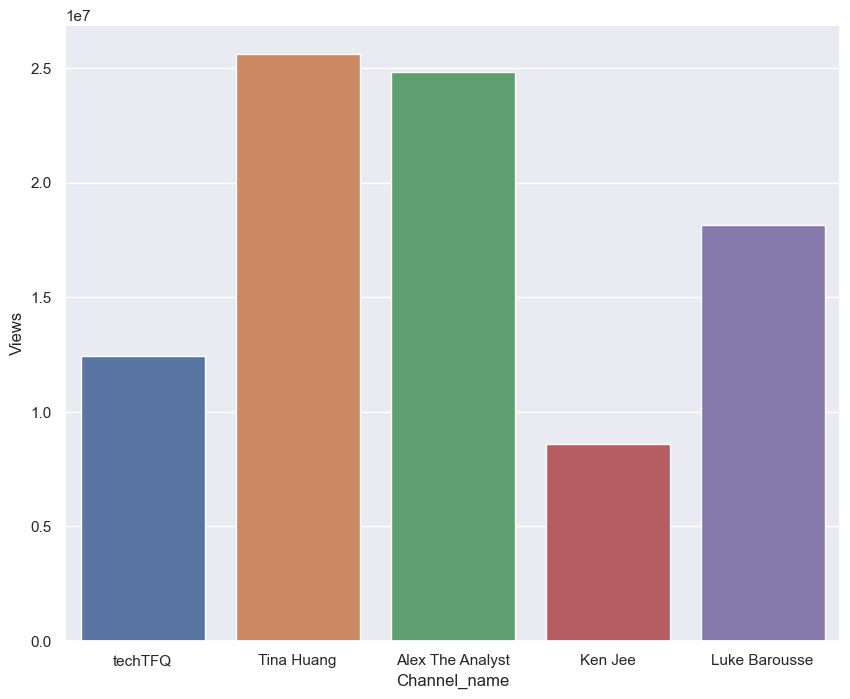

In [11]:
ax = sns.barplot(x = 'Channel_name' ,y = 'Views' ,data=channel_stats_df)

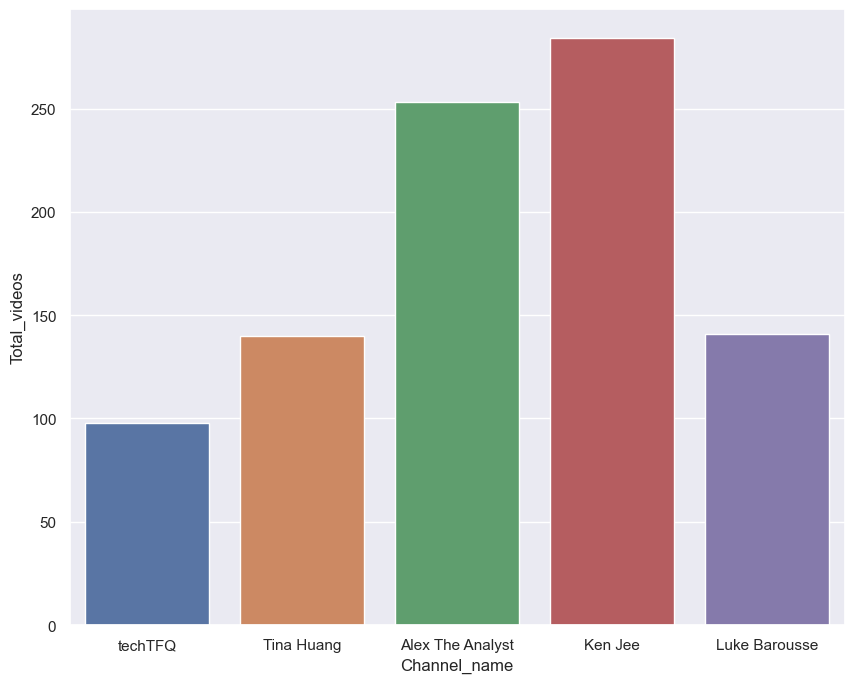

In [12]:
ax = sns.barplot(x = 'Channel_name' ,y = 'Total_videos' ,data=channel_stats_df)

**Scrape video details for a youtube channel**

In [24]:
playlist_id= channel_stats_df.loc[channel_stats_df['Channel_name']=='Alex The Analyst','playlist_id'].iloc[0]
playlist_id

'UU7cs8q-gJRlGwj4A8OmCmXg'

In [39]:
#Function to get video ids

def get_video_ids(youtube,playlist_id):  
    #Refer the api documentation 
    request =youtube.playlistItems().list(
             part ='contentDetails',
             playlistId = playlist_id,
             maxResults =50  #We can just past max 50 
    )

    response = request.execute()

    video_ids=[]
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    #get the next page token from the response objects
    next_page_token = response.get('nextPageToken')
    more_pages = True

    #to next the remaining video id we nee to implement the below
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request =youtube.playlistItems().list(
                part ='contentDetails',
                playlistId = playlist_id,
                maxResults =50,
                pageToken = next_page_token
            )  
            response = request.execute()

            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')
                   

   
     
    return video_ids

In [40]:
video_ids = get_video_ids(youtube,playlist_id)
video_ids

['h4KTy2wxYcQ',
 'LaRXtE4OG9A',
 'J0PcCv9f4JQ',
 '_DGn-7134i0',
 'EflE8U30pBo',
 'j_sHaBJEHMk',
 'xuyKzpJ2SaY',
 'D0mEy6bJ2lA',
 'GaoAc3-hScQ',
 'bxIF9X9k2IE',
 'z_xWpa88R0A',
 '7PoZBuIUnEU',
 'fq1-e-GbihE',
 'Xkb6h3YXl_c',
 'qDprq7Xbrqw',
 'UOHxb9ndpMM',
 '_h_A_n8Z9QQ',
 '_oCUSMX4_3k',
 'OnS01G8W6nw',
 'ugkyfUTc6AU',
 'eON-PNPae8Y',
 '41nX2ZgGzcE',
 'Le35Qsgs2lM',
 'nufF-juSZxU',
 '9NB5u17qiDY',
 'YDvJqgBv0Uc',
 'j6A28L6Tmxw',
 'W_s4c1vLGXM',
 'DWte9zjGl0I',
 'EzeeypMKx7o',
 'OISvlkfbntY',
 '8dTpNajxaH0',
 'oreAsJTNcsA',
 'xjA1HjvmoMY',
 'LO7hzmoHEIE',
 'bargNl2WeN4',
 'q-kbzWjyPak',
 'PExdWWcxmro',
 'Liv6eeb1VfE',
 'fHK4nHbUtj0',
 '5l2d_Rv0odE',
 'bDhvCp3_lYw',
 'IMU1V-JugKo',
 'FpgkpjSyBOw',
 '6jtS3Hz19kc',
 'JpSMse3eVVg',
 'TPivN7tpdwc',
 'kky9MMydnOA',
 '2izXQUoXyjA',
 'zilfrWwbteQ',
 'PJINexERxOs',
 'gTf2GLEhKgA',
 'VRmXto2YA2I',
 '6yNsc7JVPJE',
 'mBCG9J1TVTc',
 'WizLaDdsHUs',
 'kB7FV-ijdqE',
 'dFA0E-6xT_M',
 'dUpyC40cF6Q',
 'gs0FNQR0njI',
 'C75TROiiEa0',
 'rGx1QNdYzvs',
 'CUBfrd

Function to get video details

In [67]:
def get_video_details(youtube,video_ids):
    all_video_stats =[]
    #We can just get only 50 video details at a time,so we use the for loop
    for i in range(0,len(video_ids),50):

        request = youtube.videos().list(
            part="snippet,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 
        
        for video in response['items']:
            video_stats =  dict(Title = video['snippet']['title'],
                                Published_date = video['snippet']['publishedAt'],
                                Views = video['statistics']['viewCount'],
                                Likes = video['statistics']['likeCount'],
                                #DisLikes = video['statistics']['dislikeCount'],
                                Comments = video['statistics']['commentCount']
                                )

            all_video_stats.append(video_stats)


       

    return all_video_stats   

In [69]:
video_details= get_video_details(youtube,video_ids)

In [70]:
video_details_df = pd.DataFrame(video_details)
video_details_df

,Title,Published_date,Views,Likes,Comments
0,First Look at Analyst Builder! | The All-in-On...,2023-10-10T12:00:36Z,2464,269,75
1,#DataAnalysis #DataAnalyst #DataRealities,2023-10-09T12:11:16Z,4447,312,8
2,#DataAnalyst #DataCareers #DataAnalysis,2023-10-05T12:13:45Z,5023,370,13
3,Data Analyst vs Data Engineer | Responsibiliti...,2023-10-03T12:00:26Z,26564,526,41
4,Data Analyst Q/A Livestream | September Livest...,2023-09-28T16:09:03Z,7975,273,19
...,...,...,...,...,...
248,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30T14:07:55Z,64694,1555,64
249,Working at a Big Company Vs Small Company | To...,2020-01-25T16:38:39Z,14250,393,20
250,Data Analyst Salary | 100k with No Experience,2020-01-23T03:16:09Z,61358,2129,226
251,Truth About Big Companies | Told by a Fortune ...,2020-01-21T03:52:15Z,7852,296,18


In [71]:
#Convert the types into numeric

video_details_df['Published_date'] = pd.to_datetime(video_details_df['Published_date']).dt.date
video_details_df['Views'] =pd.to_numeric(video_details_df['Views'])
video_details_df['Likes'] =pd.to_numeric(video_details_df['Likes'])
video_details_df['Comments'] =pd.to_numeric(video_details_df['Comments'])



,Title,Published_date,Views,Likes,Comments
0,First Look at Analyst Builder! | The All-in-On...,2023-10-10,2464,269,75
1,#DataAnalysis #DataAnalyst #DataRealities,2023-10-09,4447,312,8
2,#DataAnalyst #DataCareers #DataAnalysis,2023-10-05,5023,370,13
3,Data Analyst vs Data Engineer | Responsibiliti...,2023-10-03,26564,526,41
4,Data Analyst Q/A Livestream | September Livest...,2023-09-28,7975,273,19
...,...,...,...,...,...
248,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30,64694,1555,64
249,Working at a Big Company Vs Small Company | To...,2020-01-25,14250,393,20
250,Data Analyst Salary | 100k with No Experience,2020-01-23,61358,2129,226
251,Truth About Big Companies | Told by a Fortune ...,2020-01-21,7852,296,18


Top ten videos

In [73]:
top_ten_videos = video_details_df.sort_values(by = 'Views', ascending=False).head(10)
top_ten_videos

,Title,Published_date,Views,Likes,Comments
158,Data Analyst Portfolio Project | SQL Data Expl...,2021-05-04,1475560,28049,3334
241,SQL Basics Tutorial For Beginners | Installing...,2020-03-01,979117,13894,1567
216,Top 5 Reasons Not to Become a Data Analyst,2020-08-12,911595,19649,1053
218,What Does a Data Analyst Actually Do?,2020-07-29,828256,16597,448
224,Data Scientist vs Data Analyst | Which Is Righ...,2020-06-10,746549,23457,848
62,How to Become a Data Analyst in 2023 (Complete...,2023-01-31,726838,27622,848
221,Data Analyst vs Business Analyst | Which Is Ri...,2020-07-03,725350,18716,570
61,FREE Data Analyst Bootcamp!!,2023-02-07,575581,22302,1136
129,How To Become A Data Analyst In 2022,2022-01-04,495720,22215,642
112,Database vs Data Warehouse vs Data Lake | What...,2022-04-26,492894,13756,230


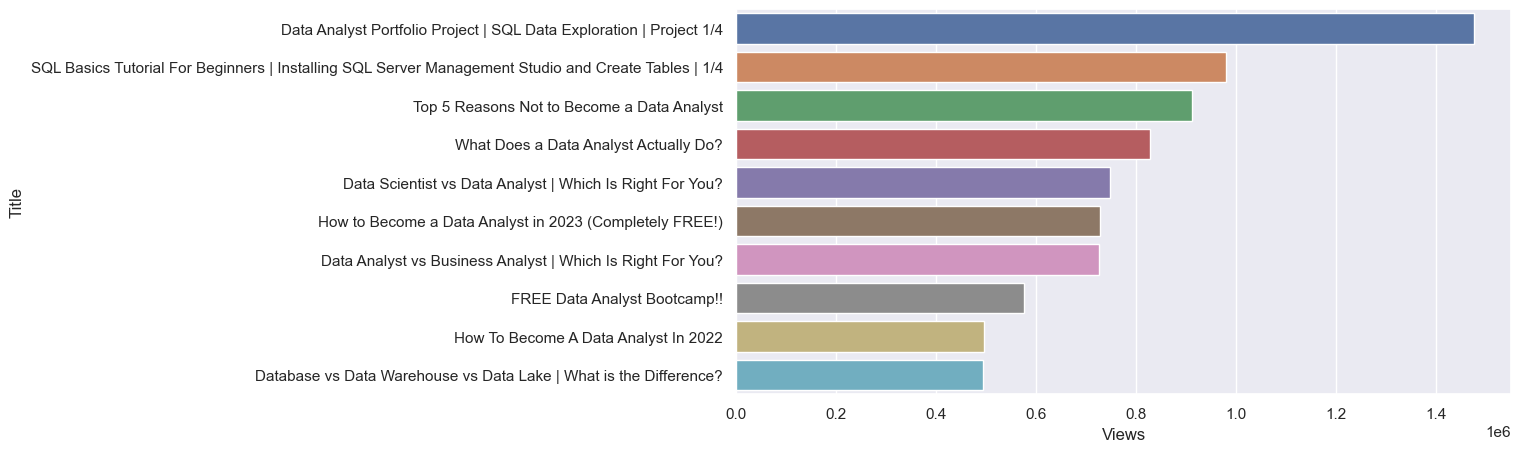

In [77]:
#sns.set(rc={'figure.figsize':(10,5)})
ax =sns.barplot(x = 'Views',y='Title',data =top_ten_videos)

In [78]:
video_details_df['Month'] = pd.to_datetime(video_details_df['Published_date']).dt.strftime('%b')
video_details_df

,Title,Published_date,Views,Likes,Comments,Month
0,First Look at Analyst Builder! | The All-in-On...,2023-10-10,2464,269,75,Oct
1,#DataAnalysis #DataAnalyst #DataRealities,2023-10-09,4447,312,8,Oct
2,#DataAnalyst #DataCareers #DataAnalysis,2023-10-05,5023,370,13,Oct
3,Data Analyst vs Data Engineer | Responsibiliti...,2023-10-03,26564,526,41,Oct
4,Data Analyst Q/A Livestream | September Livest...,2023-09-28,7975,273,19,Sep
...,...,...,...,...,...,...
248,Data Analyst Resume | Reviewing My Resume! | F...,2020-01-30,64694,1555,64,Jan
249,Working at a Big Company Vs Small Company | To...,2020-01-25,14250,393,20,Jan
250,Data Analyst Salary | 100k with No Experience,2020-01-23,61358,2129,226,Jan
251,Truth About Big Companies | Told by a Fortune ...,2020-01-21,7852,296,18,Jan


In [80]:
videos_per_month = video_details_df.groupby('Month',as_index=False).size()
videos_per_month

,Month,size
0,Apr,19
1,Aug,28
2,Dec,18
3,Feb,19
4,Jan,24
5,Jul,18
6,Jun,18
7,Mar,23
8,May,22
9,Nov,17


In [89]:
sort_order =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [90]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'],categories = sort_order,ordered=True)

In [91]:
videos_per_month = videos_per_month.sort_index()
videos_per_month

,Month,size
Month,,
Jan,Jan,24
Feb,Feb,19
Mar,Mar,23
Apr,Apr,19
May,May,22
Jun,Jun,18
Jul,Jul,18
Aug,Aug,28
Sep,Sep,23


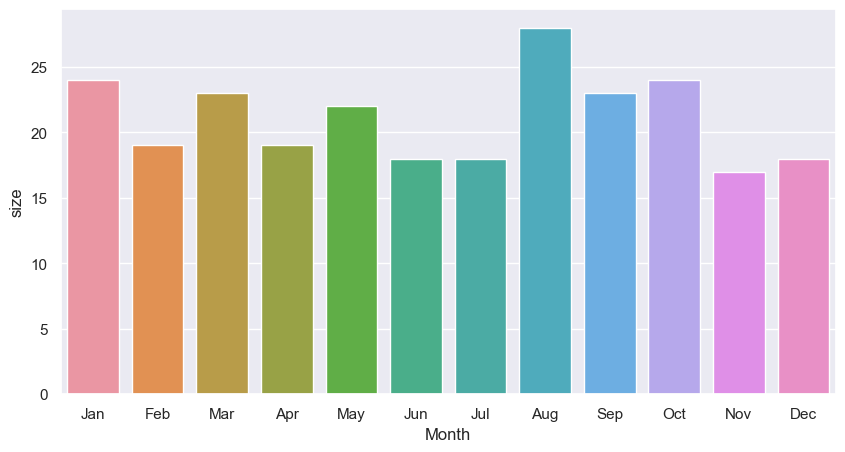

In [92]:
ax1 = sns.barplot(x='Month' , y='size',data = videos_per_month)

In [94]:
video_details_df.to_csv('Video Details(Alex the Analysts).csv')